In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
import xgboost as xgb
from imblearn.over_sampling import SMOTE


In [ ]:
df = pd.read_csv("creditcard.csv")  # Update with correct filename
print(df.head())
print(df.info())
print(df.describe())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

<ipython-input-14-b1986598a0ed>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Class"], palette="coolwarm")


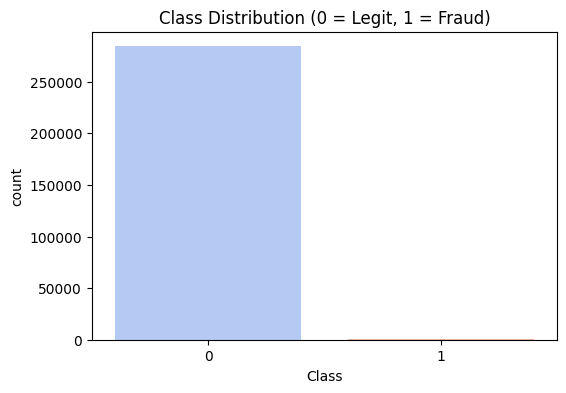

Fraudulent transactions make up 0.173% of the dataset.


In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["Class"], palette="coolwarm")
plt.title("Class Distribution (0 = Legit, 1 = Fraud)")
plt.show()

fraud_ratio = df["Class"].value_counts(normalize=True)[1] * 100
print(f"Fraudulent transactions make up {fraud_ratio:.3f}% of the dataset.")


In [ ]:
df.drop(columns=["Time"], inplace=True)

scaler = StandardScaler()
df["Amount"] = scaler.fit_transform(df[["Amount"]])


In [ ]:
X = df.drop(columns=["Class"])
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(f"New Class Distribution: \n{y_train_resampled.value_counts()}")


New Class Distribution: 
Class
0    227451
1    227451
Name: count, dtype: int64


In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train_resampled, y_train_resampled)
y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_lr):.2f}")


Logistic Regression Results:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962

ROC-AUC Score: 0.95


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_rf):.2f}")


Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.91


In [ ]:
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_clf.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb_clf.predict(X_test)

print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_xgb):.2f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:14:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.69      0.87      0.77        98

    accuracy                           1.00     56962
   macro avg       0.84      0.93      0.88     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.93


<ipython-input-21-53c12cbb5e3c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=roc_scores, palette="coolwarm")


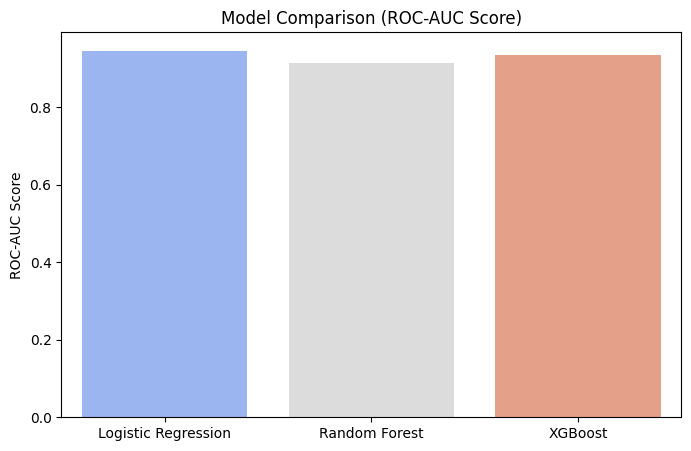

In [ ]:
models = ["Logistic Regression", "Random Forest", "XGBoost"]
roc_scores = [roc_auc_score(y_test, y_pred_lr), roc_auc_score(y_test, y_pred_rf), roc_auc_score(y_test, y_pred_xgb)]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=roc_scores, palette="coolwarm")
plt.title("Model Comparison (ROC-AUC Score)")
plt.ylabel("ROC-AUC Score")
plt.show()
